<a href="https://colab.research.google.com/github/yanj227/data_analysis/blob/main/R%E8%AA%9E%E8%A8%80_iris%E5%88%86%E7%BE%A4_%E5%BB%96%E6%99%8F%E5%B0%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.0 分類 (The k-Means Clustering)  
本節展示鳶尾花(iris)資料集的k均值分類。


*   首先，我們從數據中刪除物種進行分類。 之後我們將函數kmeans（）應用於iris2，並將聚類結果存儲在kmeans.result中。 
*   本節介紹如何在包中使用函數kmeans()構建鳶尾花(iris)資料集的k均值分類
其中Sepal.Length，Sepal.Width，Petal.Length和Petal.Width被用來預測鳶尾花品種分類
在函數kmeans()構建分類，而 predict（）對新數據進行預測。





In [1]:
data(iris)#輸入內建資料及直接使用data()
head(iris)#head()顯示前6筆
# teens <- read.csv(file.choose()) # please choose snsdata.csv

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


##what is str()
它可以用作替代summary()但str()比summary().它提供了關於行(觀察)和列(變量)的信息以及附加信息，如列的名稱、每列的類別以及每列的一些初始觀察。

In [2]:
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


將完整資料傳至iris2保存....iris是鳶尾花

In [3]:
iris2 <- iris

## 首先，我們從數據中刪除物種進行分類。 
如此一來就不會用物種名稱影響k-means預測分群

In [4]:
#先把物種欄位清空，再顯示前6筆
iris2$Species <- NULL
head(iris2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
,<dbl>,<dbl>,<dbl>,<dbl>
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
6,5.4,3.9,1.7,0.4


In [5]:
#使用?可了解其內容
?kmeans
# K-Means Clustering
# kmeans(x, centers, iter.max = 10, nstart = 1,
#        algorithm = c("Hartigan-Wong", "Lloyd", "Forgy",
#                      "MacQueen"), trace=FALSE)

#2.0  k-means動畫示例 ----(R-studio上跑.)

In [6]:
### 2.0 k-means動畫示例 ----
#install.packages("animation")
#library(animation)#像是python的import
# 先選取 plots 頁籤
#kmeans.ani()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘magick’


Warning message in install.packages("animation"):
“installation of package ‘Rcpp’ had non-zero exit status”
Warning message in install.packages("animation"):
“installation of package ‘magick’ had non-zero exit status”
Warning message in install.packages("animation"):
“installation of package ‘animation’ had non-zero exit status”


ERROR: ignored

## 預測分群結果與叢集中心

In [8]:
(kmeans.result <- kmeans(iris2, center=3))
##這邊的數字3可以由我們修改，找出最適分群
##3也可寫成center=3

K-means clustering with 3 clusters of sizes 62, 50, 38

Cluster means:
  Sepal.Length Sepal.Width Petal.Length Petal.Width
1     5.901613    2.748387     4.393548    1.433871
2     5.006000    3.428000     1.462000    0.246000
3     6.850000    3.073684     5.742105    2.071053

Clustering vector:
  [1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 3 3 3 3 1 3 3 3 3
[112] 3 3 1 1 3 3 3 3 1 3 1 3 1 3 3 1 1 3 3 3 3 3 1 3 3 3 3 1 3 3 3 1 3 3 3 1 3
[149] 3 1

Within cluster sum of squares by cluster:
[1] 39.82097 15.15100 23.87947
 (between_SS / total_SS =  88.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [9]:
names(kmeans.result)

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"

In [10]:
kmeans.result$cluster

[1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 3 3 3 3 1 3 3 3 3
[112] 3 3 1 1 3 3 3 3 1 3 1 3 1 3 3 1 1 3 3 3 3 3 1 3 3 3 3 1 3 3 3 1 3 3 3 1 3
[149] 3 1

In [11]:
table(iris$Species, kmeans.result$cluster)

            
              1  2  3
  setosa      0 50  0
  versicolor 48  0  2
  virginica  14  0 36

算出誤差率為10.667%

In [12]:
(14+2)/150   # [1] 0.1066667

[1] 0.1066667

# 3.0 繪製聚類及其中心圖

##圖 iris的散佈圖矩陣

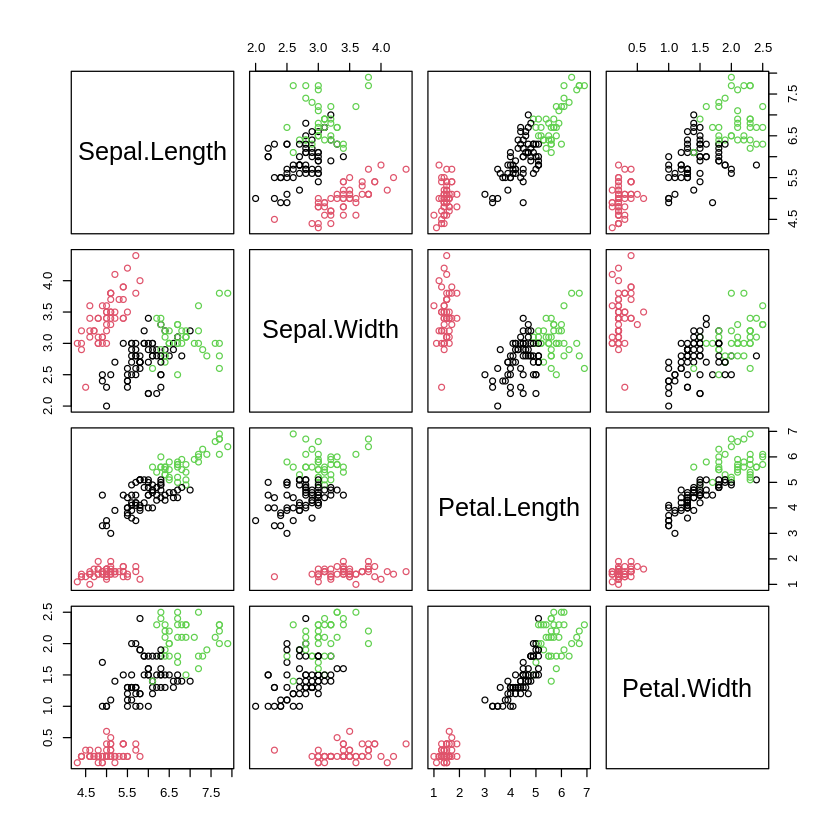

In [13]:
plot(iris2,col=kmeans.result$cluster)#cluster=分群的意思

#kmeans.result表格中(值)的cluster欄位

###sepal圖(花萼)

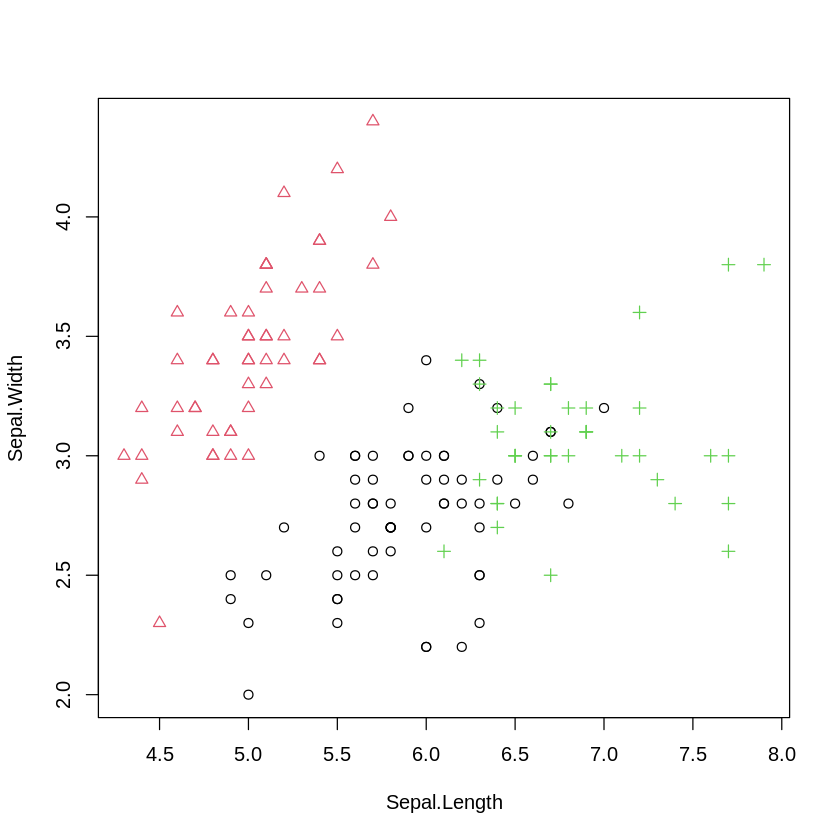

In [14]:
plot(iris2[c("Sepal.Length", "Sepal.Width")], col = kmeans.result$cluster,
     pch = kmeans.result$cluster)#pch.....> different point shape

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,5.901613,2.748387,4.393548,1.433871
2,5.006000,3.428000,1.462000,0.246000
3,6.850000,3.073684,5.742105,2.071053


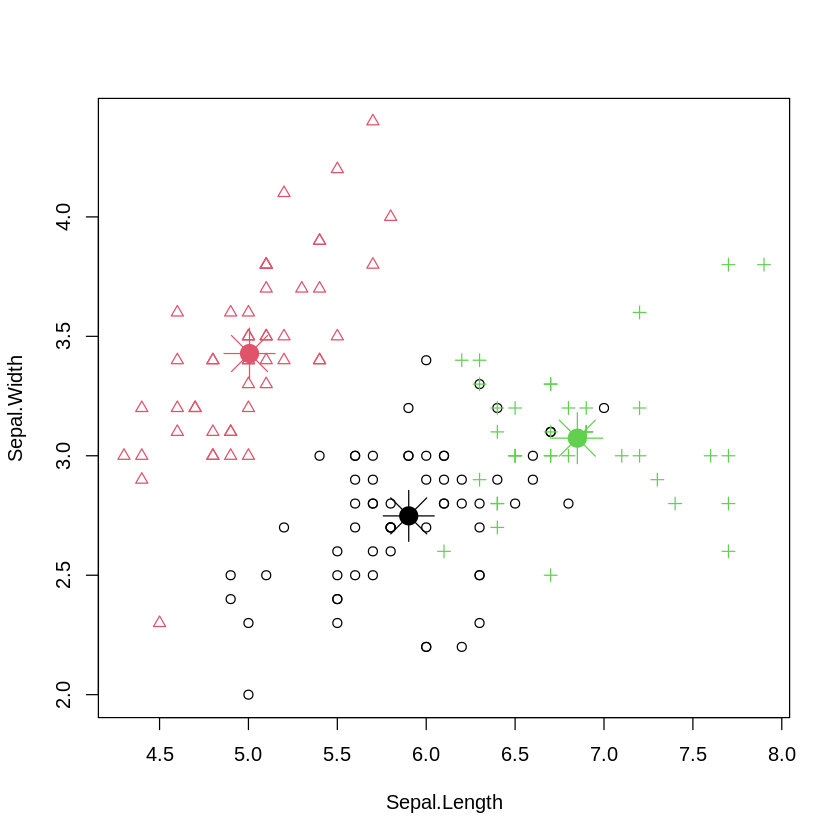

In [16]:
kmeans.result$centers

plot(iris2[c("Sepal.Length", "Sepal.Width")], col = kmeans.result$cluster,
     pch = kmeans.result$cluster)
points(kmeans.result$centers[ ,c("Sepal.Length", "Sepal.Width")], col = 1:3,
             pch = 8, cex=4)
points(kmeans.result$centers[ ,c("Sepal.Length", "Sepal.Width")], col = 1:3,
             pch = 19, cex=2)

###petal圖(花瓣)

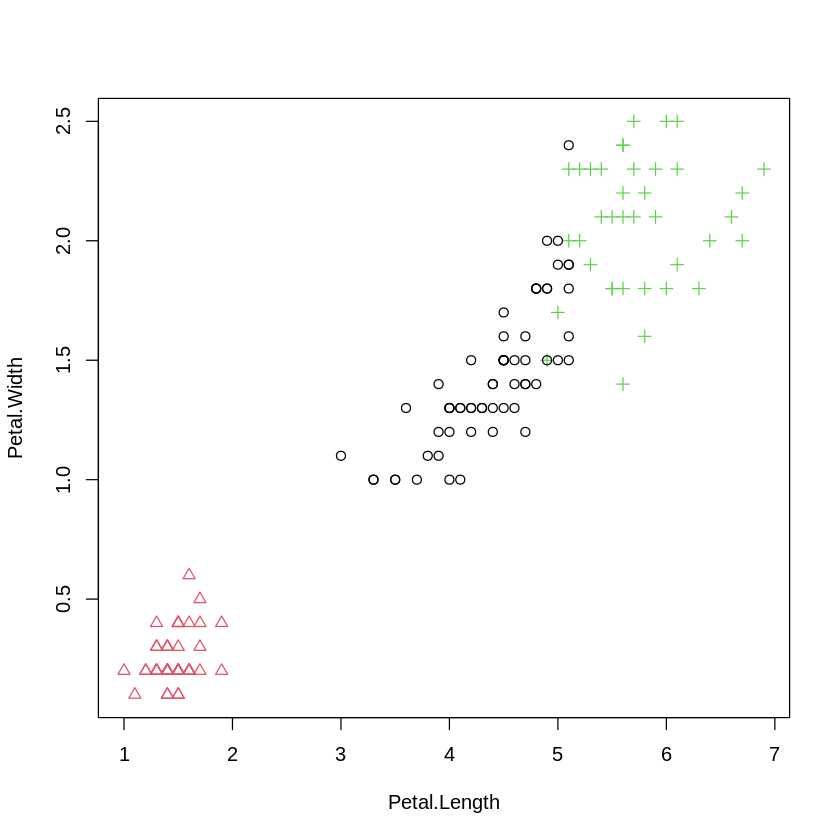

In [17]:
plot(iris2[c("Petal.Length", "Petal.Width")], col = kmeans.result$cluster,
     pch = kmeans.result$cluster)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,5.901613,2.748387,4.393548,1.433871
2,5.006000,3.428000,1.462000,0.246000
3,6.850000,3.073684,5.742105,2.071053


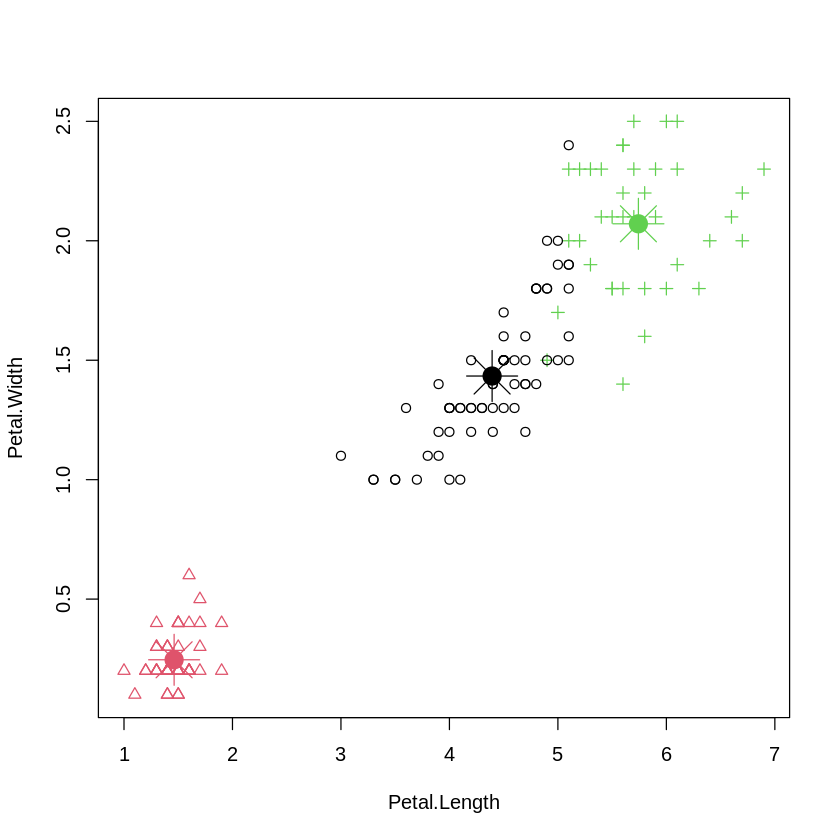

In [18]:
kmeans.result$centers
#   Sepal.Length Sepal.Width Petal.Length Petal.Width
# 1     6.850000    3.073684     5.742105    2.071053
# 2     5.901613    2.748387     4.393548    1.433871
# 3     5.006000    3.428000     1.462000    0.246000
plot(iris2[c("Petal.Length", "Petal.Width")], col = kmeans.result$cluster,
     pch = kmeans.result$cluster)
points(kmeans.result$centers[ ,c("Petal.Length", "Petal.Width")], col = 1:3,
             pch = 8, cex=4)
points(kmeans.result$centers[ ,c("Petal.Length", "Petal.Width")], col = 1:3,
             pch = 19, cex=2)

#4.0 利用集群找出離群值並將離群值和集群中心標示出來

In [19]:
names(kmeans.result)

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"

In [20]:
kmeans.result

K-means clustering with 3 clusters of sizes 62, 50, 38

Cluster means:
  Sepal.Length Sepal.Width Petal.Length Petal.Width
1     5.901613    2.748387     4.393548    1.433871
2     5.006000    3.428000     1.462000    0.246000
3     6.850000    3.073684     5.742105    2.071053

Clustering vector:
  [1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 3 3 3 3 1 3 3 3 3
[112] 3 3 1 1 3 3 3 3 1 3 1 3 1 3 3 1 1 3 3 3 3 3 1 3 3 3 3 1 3 3 3 1 3 3 3 1 3
[149] 3 1

Within cluster sum of squares by cluster:
[1] 39.82097 15.15100 23.87947
 (between_SS / total_SS =  88.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

##k-means components 說明，可在下方一一試驗結果

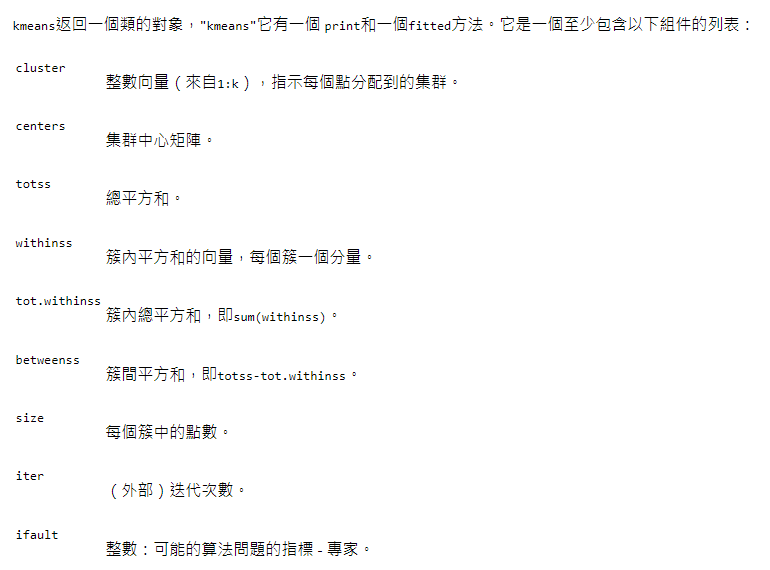

In [21]:
#取一組件測試
kmeans.result$totss

[1] 681.3706

In [22]:
kmeans.result$centers

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,5.901613,2.748387,4.393548,1.433871
2,5.006000,3.428000,1.462000,0.246000
3,6.850000,3.073684,5.742105,2.071053


In [23]:
centers = kmeans.result$centers[kmeans.result$cluster, ]
head(centers)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
2,5.006,3.428,1.462,0.246
2,5.006,3.428,1.462,0.246
2,5.006,3.428,1.462,0.246
2,5.006,3.428,1.462,0.246
2,5.006,3.428,1.462,0.246
2,5.006,3.428,1.462,0.246


In [24]:
distances = sqrt(rowSums((iris2-centers)^2)) #計算距離
head(distances)

[1] 0.1413506 0.4476382 0.4171091 0.5253380 0.1886266 0.6770377

In [25]:
outliers = order(distances,decreasing=T)[1:5] #找出離群值前五個

outliers
# [1]  99  58  94  61 119

[1]  99  58  94  61 119

In [28]:
iris2[outliers, ]
#     Sepal.Length Sepal.Width Petal.Length Petal.Width
# 99           5.1         2.5          3.0         1.1
# 58           4.9         2.4          3.3         1.0
# 94           5.0         2.3          3.3         1.0
# 61           5.0         2.0          3.5         1.0
# 119          7.7         2.6    

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
,<dbl>,<dbl>,<dbl>,<dbl>
99,5.1,2.5,3.0,1.1
58,4.9,2.4,3.3,1.0
94,5.0,2.3,3.3,1.0
61,5.0,2.0,3.5,1.0
119,7.7,2.6,6.9,2.3


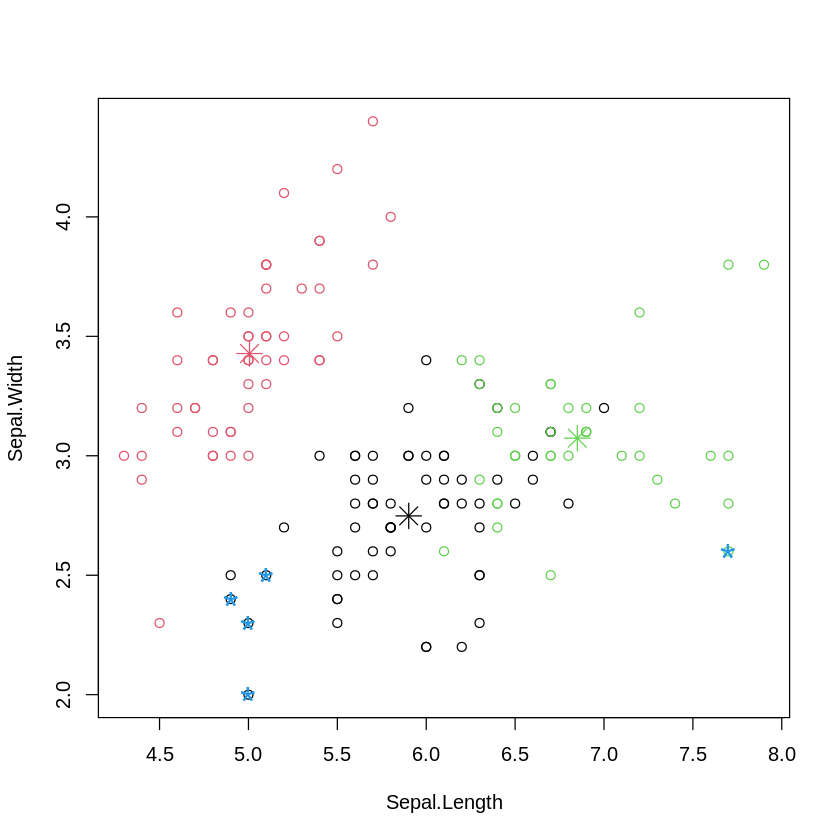

In [29]:
plot(iris2[c("Sepal.Length", "Sepal.Width")], col=kmeans.result$cluster)
points(kmeans.result$centers[,c("Sepal.Length", "Sepal.Width")], col=1:3, pch=8, cex=2)
points(iris2[outliers,c("Sepal.Length", "Sepal.Width")], col=4, pch='*', cex=2)

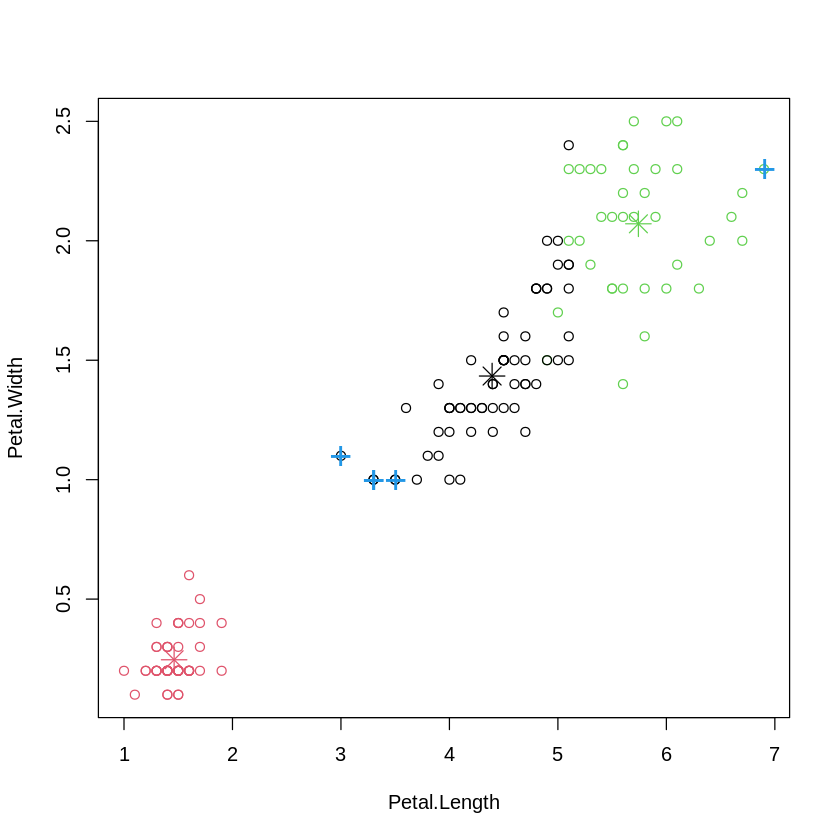

In [30]:
plot(iris2[c("Petal.Length", "Petal.Width")], col=kmeans.result$cluster)
points(kmeans.result$centers[,c("Petal.Length", "Petal.Width")], col=1:3, pch=8, cex=2)
points(iris2[outliers,c("Petal.Length", "Petal.Width")], col=4, pch='+', cex=2)

#5.0  看看我們的資料分布

##基礎的plot函數可依參數的性質畫出不同的X-Y散佈圖、長條圖、盒狀圖、散佈圖矩陣：

###花萼長度(Sepal Length)與花萼寬度(Sepal Width) 散佈圖

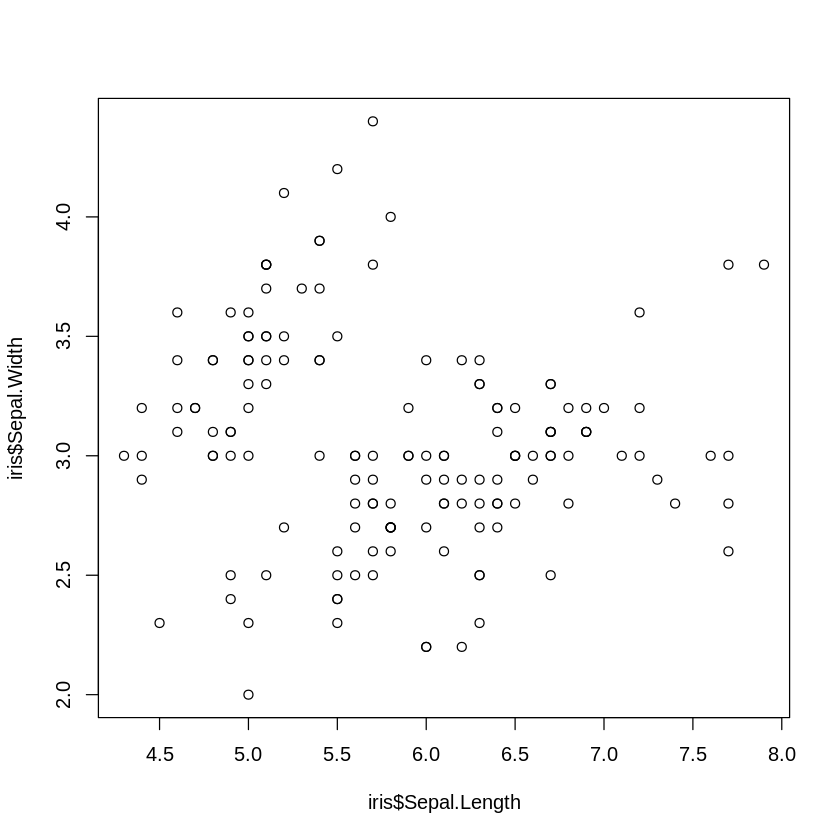

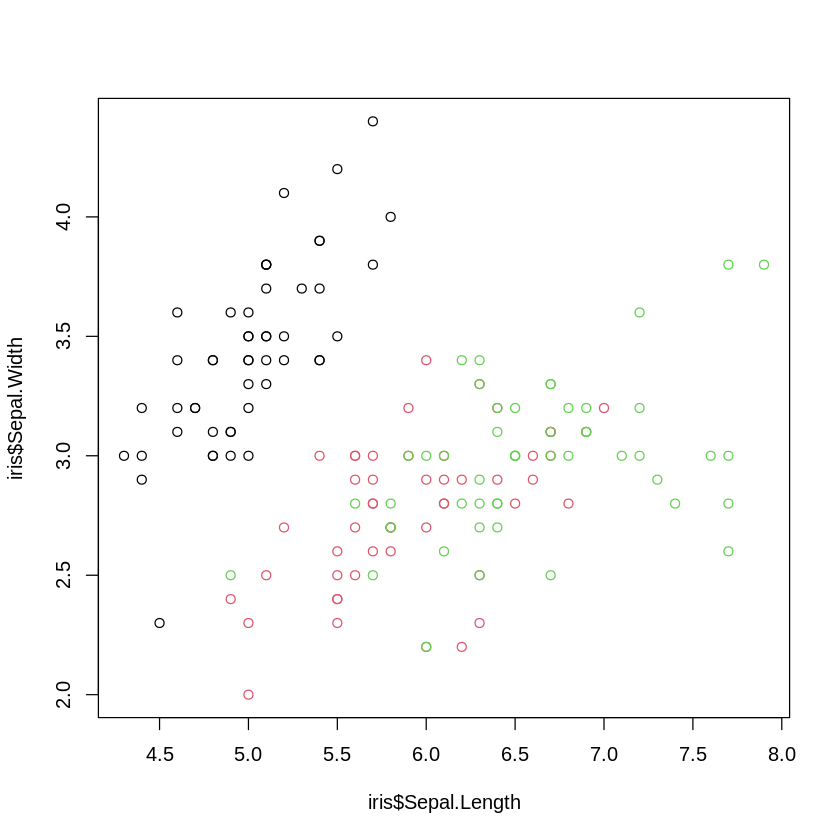

In [31]:
#花萼長度(Sepal Length)與花萼寬度(Sepal Width) 散佈圖
plot(iris$Sepal.Length, iris$Sepal.Width) 
plot(iris$Sepal.Length, iris$Sepal.Width, col = iris$Species)

###品種類別(Species Class) 長條圖

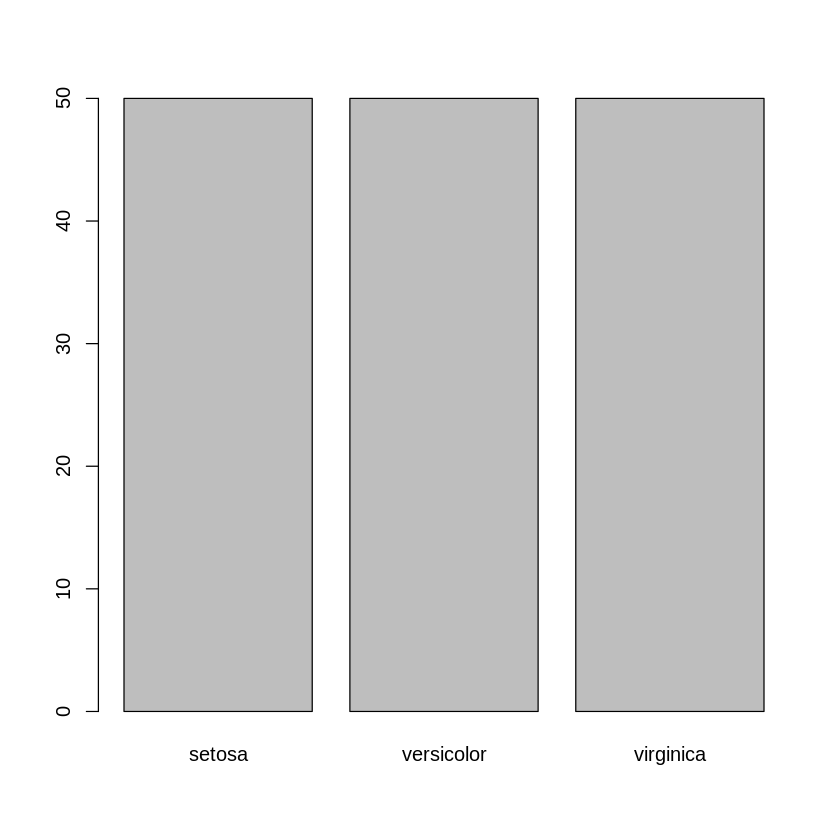

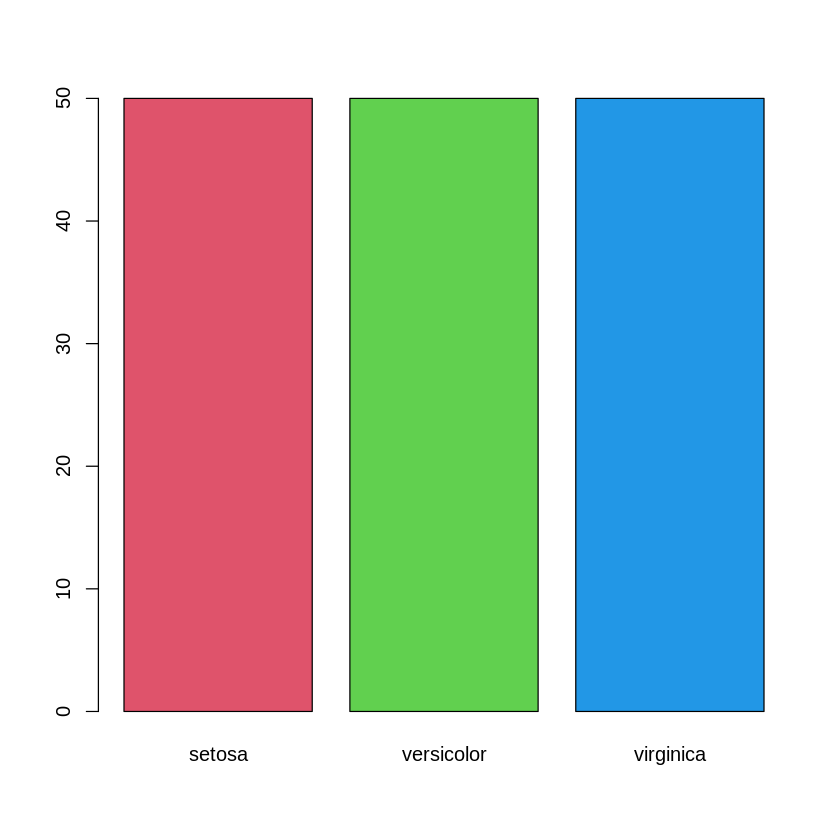

In [32]:
###品種類別(Species Class) 長條圖
plot(iris$Species)
plot(iris$Species, col = 2:4) 

###品種類別(Species Class)與花萼長度(Sepal Length) 盒鬚圖

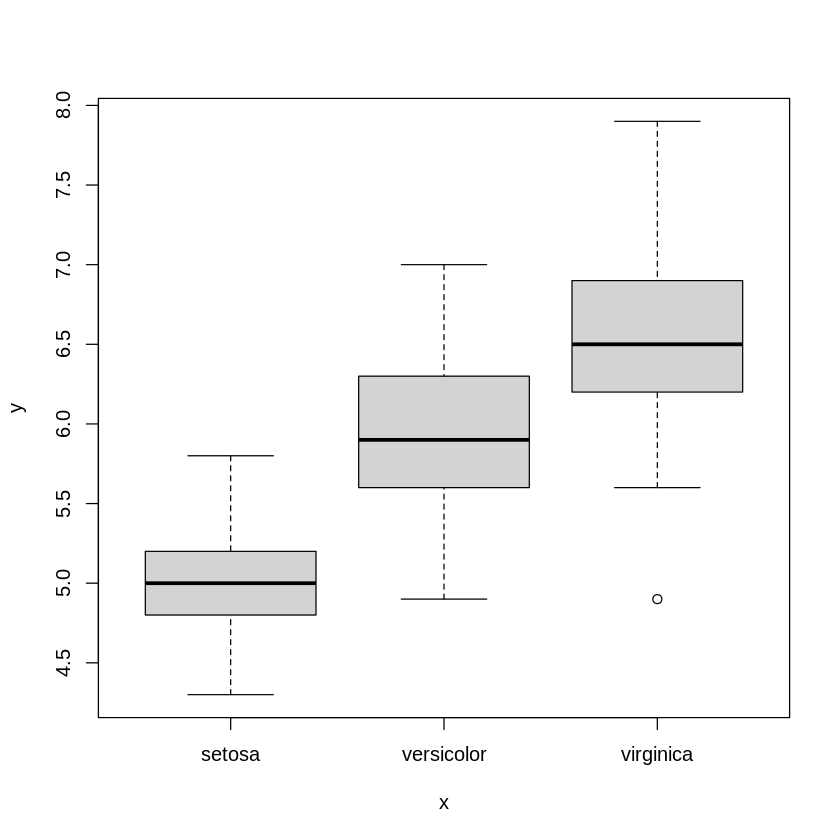

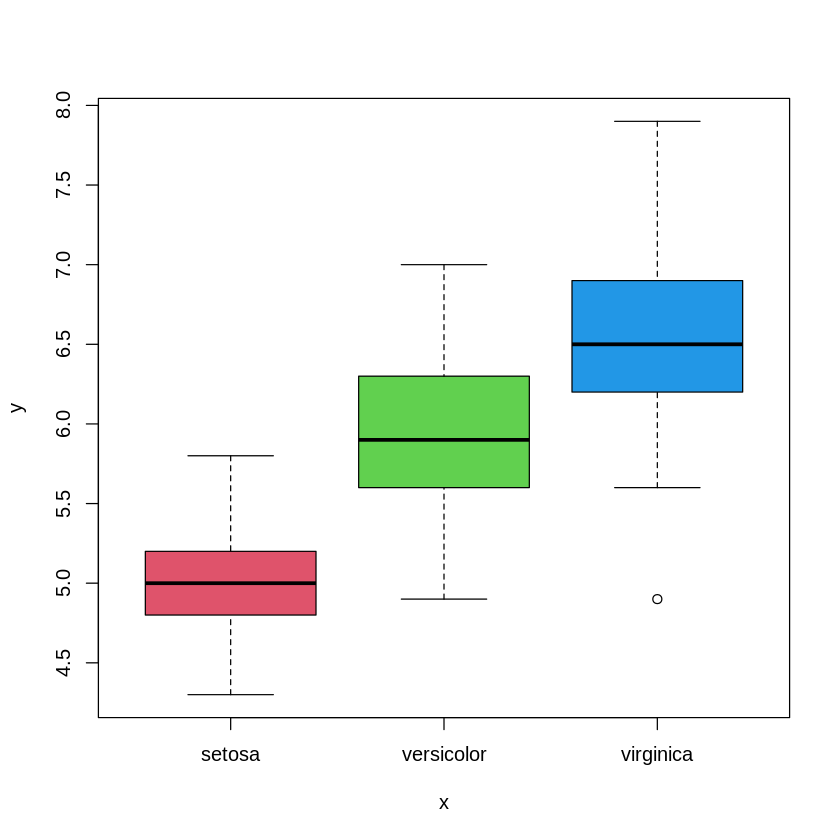

In [33]:
###品種類別(Species Class)與花萼長度(Sepal Length) 盒鬚圖
plot(iris$Species, iris$Sepal.Length) 
plot(iris$Species, iris$Sepal.Length, col = 2:4) 


- 上圖可看出sentosa的sepal比起virginica來的小許多
- "sepal"為判斷品種的重要根據

###散佈圖矩陣

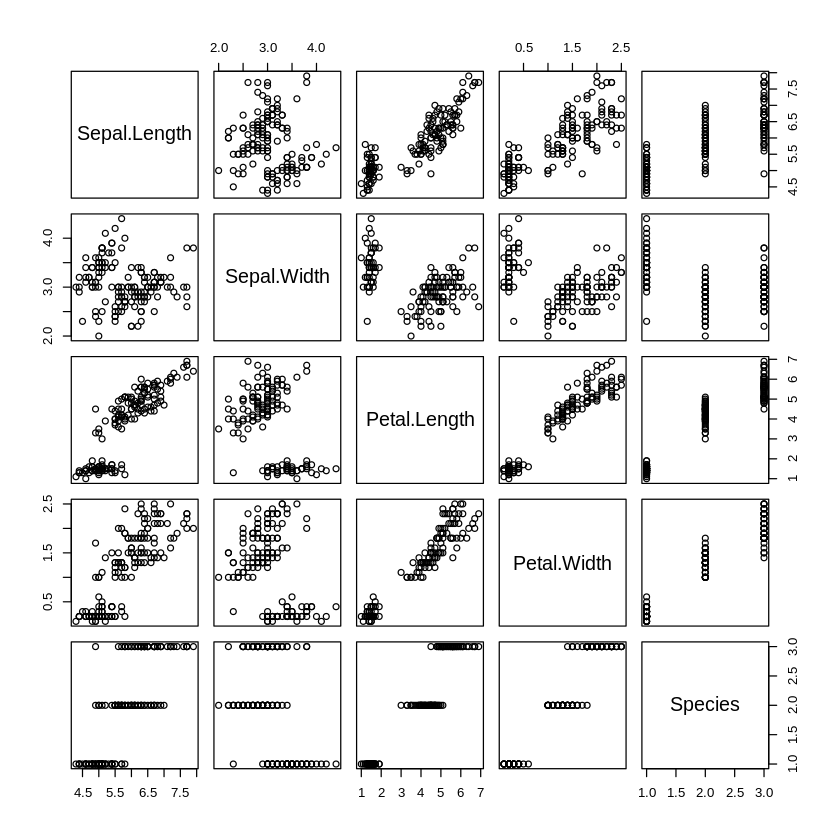

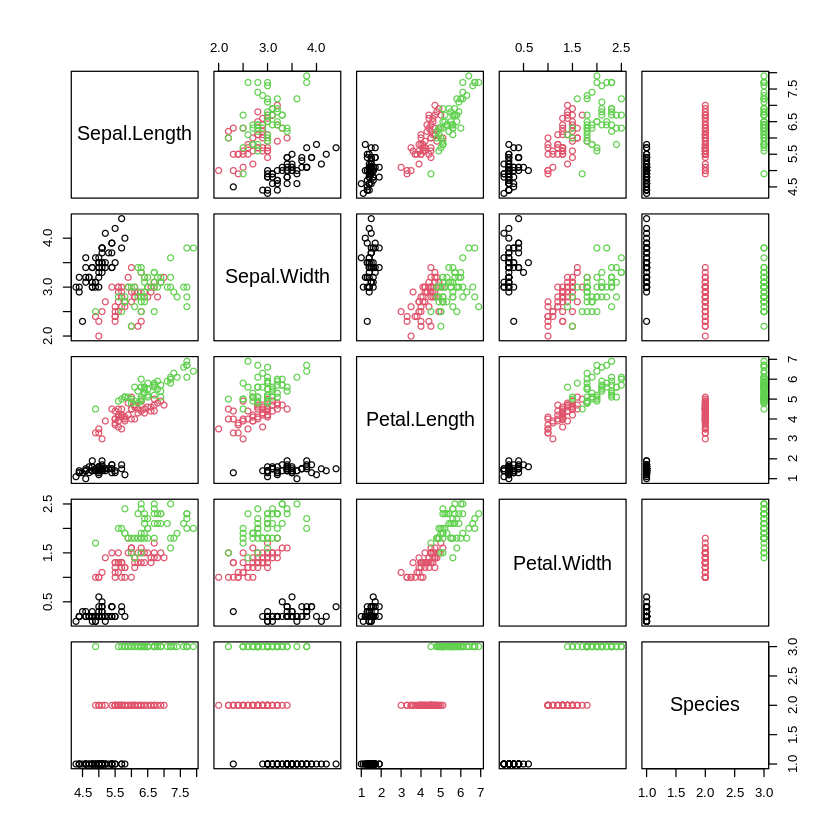

In [34]:
###散佈圖矩陣
plot(iris)
plot(iris, col = iris$Species)
pairs(iris, col = iris$Species)

###分別來看看各品種的長度散佈圖矩陣

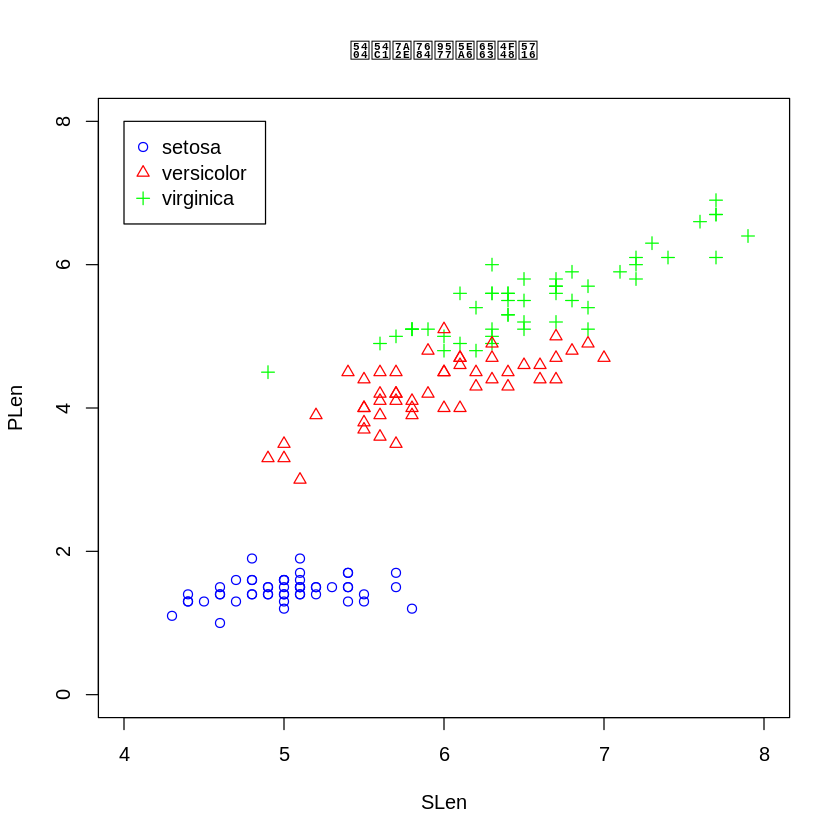

In [35]:
attach(iris)
plot(Sepal.Length[Species=="setosa"],Petal.Length[Species=="setosa"], 
     pch=1 ,col="blue", xlim=c(4,8), ylim= c(0,8), 
     main="各品種的長度散佈圖", xlab= "SLen", ylab= "PLen")
points(Sepal.Length[Species=="virginica"], Petal.Length[Species== "virginica"],
       pch=3,col="green")
points(Sepal.Length[Species=="versicolor"], Petal.Length[Species== "versicolor"],
       pch=2,col="red")
legend(4,8,legend=c("setosa","versicolor","virginica"), col=c("blue","red","green"), pch=c(1,2,3))


# 6.0 The k-Medoids 中心點劃分 Clustering 與 估計聚類數量? 


In [36]:
?pamk#使用pamk需先安裝fpc,再library

In [37]:
install.packages("fpc")
library(fpc)
pamk.result <- pamk(iris2)
pamk.result

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘modeltools’, ‘DEoptimR’, ‘mclust’, ‘flexmix’, ‘prabclus’, ‘diptest’, ‘robustbase’, ‘kernlab’




$pamobject
Medoids:
      ID Sepal.Length Sepal.Width Petal.Length Petal.Width
[1,]   8          5.0         3.4          1.5         0.2
[2,] 127          6.2         2.8          4.8         1.8
Clustering vector:
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[149] 2 2
Objective function:
    build      swap 
0.9901187 0.8622026 

Available components:
 [1] "medoids"    "id.med"     "clustering" "objective"  "isolation" 
 [6] "clusinfo"   "silinfo"    "diss"       "call"       "data"      

$nc
[1] 2

$crit
 [1] 0.0000000 0.6857882 0.5528190 0.4896972 0.4867481 0.4703951 0.3390116
 [8] 0.3318516 0.2918520 0.2918482


In [38]:
pamk.result$nc
# [1] 2最佳聚類數
#最好的分群是2分法

[1] 2

以物種分群

In [39]:
# check clustering against actual species
table(pamk.result$pamobject$clustering, iris$Species)
#   setosa versicolor virginica
# 1     50          1         0
# 2      0         49        50

   
    setosa versicolor virginica
  1     50          1         0
  2      0         49        50

In [40]:
# 分的還不錯，準度非常高
149/150  # [1] 0.9933333

[1] 0.9933333

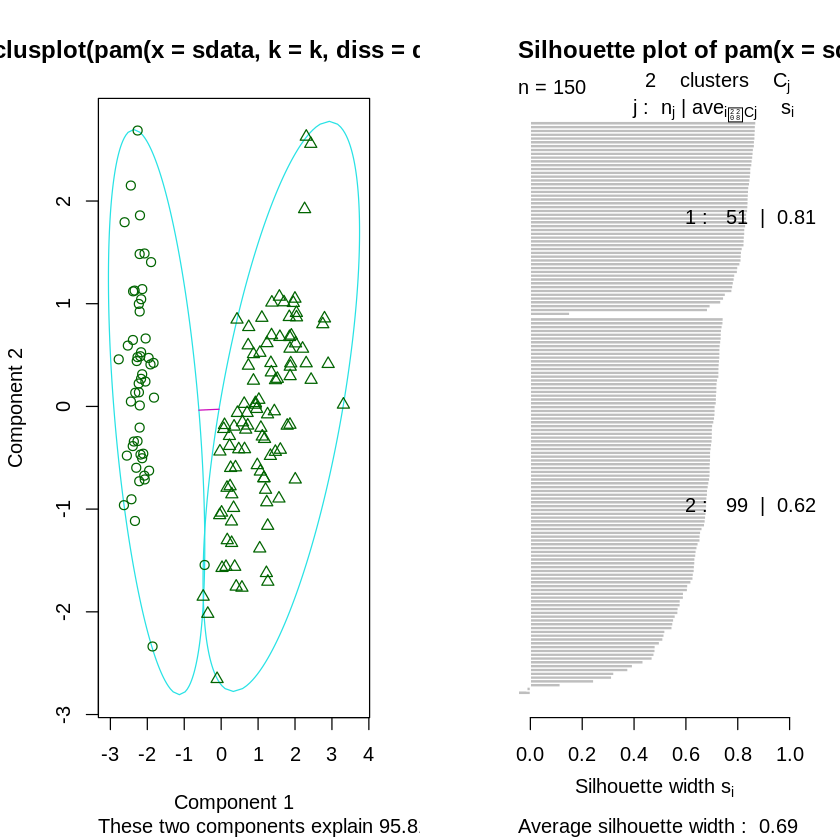

In [41]:
layout(matrix(c(1,2),1,2)) # 2 graphs per page
plot(pamk.result$pamobject)   # pamk.result中的變數 $pamobject

In [42]:
layout(matrix(1)) # change back to one graph per page

In [43]:
# pamk.result中的變數 $pamobject
pamk.result$pamobject

Medoids:
      ID Sepal.Length Sepal.Width Petal.Length Petal.Width
[1,]   8          5.0         3.4          1.5         0.2
[2,] 127          6.2         2.8          4.8         1.8
Clustering vector:
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[149] 2 2
Objective function:
    build      swap 
0.9901187 0.8622026 

Available components:
 [1] "medoids"    "id.med"     "clustering" "objective"  "isolation" 
 [6] "clusinfo"   "silinfo"    "diss"       "call"       "data"      